<a href="https://colab.research.google.com/github/Yukiharossauro/imersao_alura_3/blob/main/imersao_03_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imersão Alura - Aula 1 - 03/05/2021


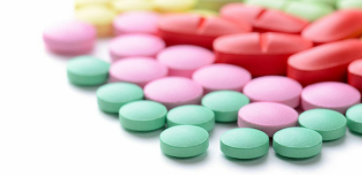

O dataframe a seguir aborda um estudo feito com n amostras de cultura celular e sua resposta à diversos fármacos.

# Importando bibliotecas importantes e dados de trabalho

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

As bibliotecas acima são a base de trabalho para manipulação de dados e também visualização. Possivelmente algumas outras bibliotecas gráficas sejam importadas para um estudo mais dinâmico.

Para manter um código limpo, vamos criar a variável url_dados abaixo, desta maneira conseguimos criar nosso dataframe de maneira mais clean

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/raw/main/dados/dados_experimentos.zip'

Como o arquivo fornecido pela Alura está zipado, passamos o paratmetro COMPRESSION para o código abaixo.

In [ ]:
df = pd.read_csv(url_dados, compression = 'zip')

# Definição - Célula

Fonte: https://pt.wikipedia.org/wiki/C%C3%A9lula

Abaixo uma definição resumida sobre célula. Como o foco não é aprofundar o conhecimento sobre citologia, não entrarei nas organelas e todos os componentes celulares.

"A célula (do latim cella, que significa "pequeno aposento")[1] é a unidade básica e fundamental de todos os organismos conhecidos. Uma célula é a menor unidade funcional da matéria viva. As células são frequentemente chamadas de "blocos de construção da vida". O estudo das células é denominado biologia celular ou citologia.

Todas as as células são compostas por citoplasma, constituído por água e biomoléculas, como ácidos nucleicos e e proteínas, envolto por uma membrana plasmática. A maioria das células vegetais e animais são visíveis apenas ao microscópio, apresentando dimensões entre 1 e 100 micrômetros.[2] Os organismos podem ser classificados como unicelulares (consistindo em uma única célula, como as bactérias) ou multicelulares (incluindo plantas e animais). A maioria dos organismos unicelulares são classificados como microorganismos."



Com o comando shape, conseguimos ter as dimensÕes da nossa matriz. Ou seja, temos 877 colunas por 23814 linhas.
Cada linha é uma cultura de célula que foi exposta ou não à certo fármaco (droga)

Imagem ilustrativa de uma célula eucarionte:

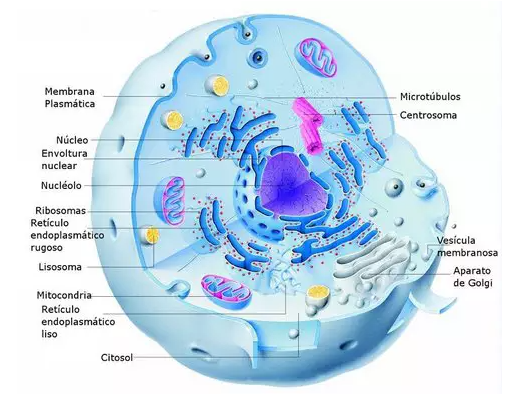

Fonte da imagem: https://www.educamaisbrasil.com.br/enem/biologia/citoesqueleto

# Definição - Cultura celular

Fonte : https://pt.wikipedia.org/wiki/Cultura_celular

Cultura celular ou cultura de células é o processo pelo qual células são cultivadas sob condições controladas, geralmente fora de seu ambiente natural. Essas condições variam para cada tipo de célula, mas geralmente consistem em um recipiente adequado com um substrato ou meio que fornece os nutrientes essenciais, como aminoácidos, carboidratos, vitaminas, minerais), fatores de crescimento, hormônios e gases (CO2 e O2) e regula o ambiente físico-químico (tampão de pH, pressão osmótica, temperatura). A maioria das células requer uma superfície ou um substrato artificial (cultura aderente ou monocamada), enquanto outras podem ser cultivadas flutuando livremente no meio de cultura. O tempo de vida da maioria das células é determinado geneticamente, mas algumas células em cultura de células foram “transformadas” em células imortais que se reproduzirão indefinidamente se as condições ideais forem fornecidas.

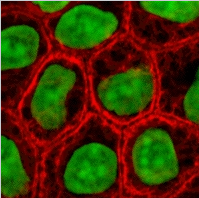

Acima podemos ver células epiteliais em cultura. Sendo a parte vermelha, queratina, e a verde DNA.

# Definição - Expressão gênica

Seguindo a explicação da Vanessa, cada trecho de DNA é também conhecido como gene. 

O gene é responsável por conter informação genética que possibilita ao RNA mensageiro levar estas informações até os locais onde as respectivas proteinas são sintetizadas. Fatores internos e externos, tais como drogas, hormônios, estresse, luz, temperatura, pH etc...podem desencadear respostas diferentes. Estas respostas diferentes também são chamadas de expressão gênica. Abaixo a imagem compartilhada na primeira aula da Imersão de dados Alura.

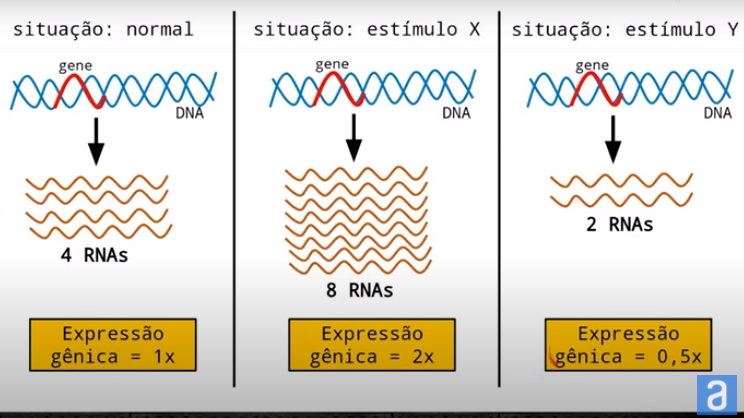

As colunas g# e c# são reflexo destas respostas, que podem ser para mais ou para menos dependendo do estímulo.

# Conhecendo nossos dados

In [ ]:
df.shape

(23814, 877)

Nosso dataframe é composto de 877 variáveis (colunas) e 23814 samples. Cada sample neste estudo representa uma cultura celular que foi submetida à um determinado estudo. Seja ela com ou sem fármaco (droga).

In [ ]:
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


**id - inicialmente esta coluna parece identificar as culturas celulares. Vamos analisar**

In [ ]:
df.id.describe()

count            23814
unique           23814
top       id_867918d84
freq                 1
Name: id, dtype: object

A coluna id possui 23814 valores únicos, desta forma temos 23814 culturas diferentes. Ou seja, a mesma cultura não é submetida ao mesmo estudo 2 vezes ou exposta à um segundo estudo.

O tipo de informação contida aqui é [object] ou seja, é uma string

**tratamento - inicialmente classfica qual cultura foi ou não exposta à fármacos**

In [ ]:
df.tratamento.describe()

count         23814
unique            2
top       com_droga
freq          21948
Name: tratamento, dtype: object

Temos também o mesmo número de culturas celulares (23814). Mas desta vez possuimos apenas 2 valores únicos.

In [ ]:
df.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
df.tratamento.value_counts(normalize= True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Temos 2 valores: com_droga e com_controle. 

O valor [com_controle] indica que apenas o fator fármaco foi alterado na cultura celular, ou seja, as demais variáveis se mantiveram igual se comparadas às amostras [com_droga].

O valor [com_droga] indica que aquela cultura celular foi exposta ao fármaco em questão.

De forma visual, temos o gráfico abaixo:

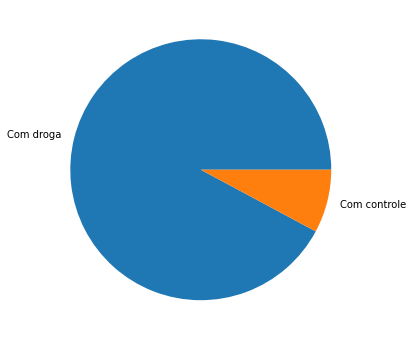

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
plt.pie(df.tratamento.value_counts(), labels = ['Com droga', 'Com controle'])
plt.show()

**tempo - inicialmente indica o tempo que a cultura celular foi exposta ao fármaco**

In [ ]:
df.tempo.describe()

count    23814.000000
mean        48.020156
std         19.402807
min         24.000000
25%         24.000000
50%         48.000000
75%         72.000000
max         72.000000
Name: tempo, dtype: float64

A coluna tempo, diferente do até então visto apresenta valores numéricos.

In [ ]:
len(df.tempo.unique())

3

Temos aqui apenas 3 valores únicos.

In [ ]:
df.tempo.unique()

array([24, 72, 48])

Pelos valores únicos, vemos que as culturas celulares foram expostas à 1, 2 e 3 dias ao fármaco em questão.

Este tempo de exposição está associado à cinética química das células x fármaco. Diferentes drogas possuem diferentes cinéticas químicas com difrentes rotas bioquímicas.

In [ ]:
df.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [ ]:
df.tempo.value_counts(normalize= True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

Aparentemente o dataframe está bem distribuido entre estas variáveis. Não temos aqui um viés para tempo.

De forma visual, temos:

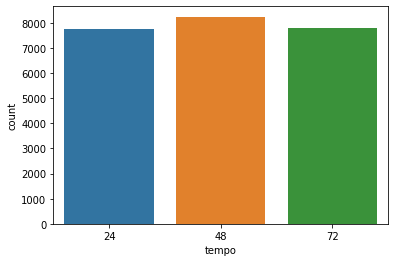

In [ ]:
sns.countplot(data = df, x = 'tempo')
plt.show()

**dose - Inicialmente indica a dose de fármaco à qual a cultura celular foi exposta**

In [ ]:
df.dose.describe()

count     23814
unique        2
top          D1
freq      12147
Name: dose, dtype: object

Aqui temos 2 valores únicos e a coluna é do tipo [object]

In [ ]:
df.dose.unique()

array(['D1', 'D2'], dtype=object)

Neste caso temos 2 grandes grupos de doses: D1 e D2.

In [ ]:
df.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
df.dose.value_counts(normalize= True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

O estudo também apresenta uma boa distribuiçao entre D1 e D2, aparentemente com baixo viés.

De forma visual, temos: 

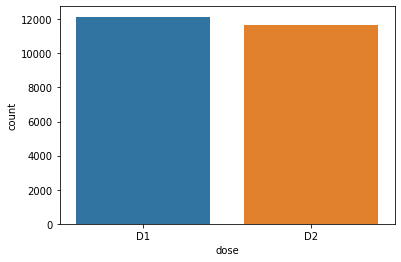

In [ ]:
sns.countplot(data = df, x = 'dose')
plt.show()

**droga - indicando possivelmente qual o fármaco/droga a ser estudado**

In [ ]:
df.droga.describe()

count         23814
unique         3289
top       cacb2b860
freq           1866
Name: droga, dtype: object

Este estudo contempla uma grande variedade de fármacos/drogas (3289). Possivelmente foi designado um nome específico para a droga de controle, mesmo que ela não tenha efeitos clínicos.

In [ ]:
df.query('tratamento == "com_controle"').droga.value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Desta forma temos um estudo com 3288 substâncias reais e uma de controle (cacb2b860).

In [ ]:
df.droga.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
1a038f0f7       1
547f80a41       1
6ec93d617       1
fb69fd749       1
b9ffc9444       1
Name: droga, Length: 3289, dtype: int64

Para facilitar a avaliação e entendimento, criarei o df_droga para análise complementar.

In [ ]:
df_droga = pd.DataFrame(df.droga.value_counts())

In [ ]:
df_droga.reset_index(inplace = True)

In [ ]:
len(df_droga.query('droga > 1'))

3160

In [ ]:
len(df_droga) - len(df_droga.query('droga > 1'))

129

Temos 129 drogas que foram testadas em apenas 1 cultura celular. Drogas testadas em poucas culturas podem ter resultados não relevantes para o estudo.

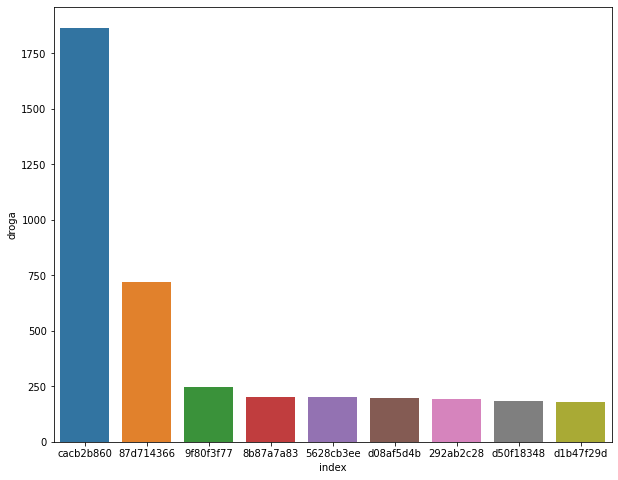

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = df_droga.query('droga > 30'), x = 'index', y = 'droga')

Aqui podemos observar que a droga mais testada foi a de controle (placebo). Apenas 8 drogas foram testadas em mais de 30 culturas conforme a query que foi realizada.

# Desafio 01 - Aula 1

Descrição: Investigar por que a feature Tratamento é tão desbalanceada

Proposta: Tendo em vista o paper abaixo

https://moodle.ufsc.br/pluginfile.php/821909/mod_resource/content/0/WEYNE%20-%20Determina%C3%A7%C3%A3o%20do%20tamanho%20da%20amostra%20EM%20PESQUISAS%20EXPERIMENTAIS%20-%202004.pdf

Podemos observar que para um estudo clínico randomizado, o ideal é que o grupo de controle tenha no mínimo o mesmo tamanho dos ensaios que de fato utilizaram a droga.

Para responder o desafio, assumirei algumas premissas:

1 - Todas as drogas são destinadas ao tratamento da mesma comorbidade
2 - Cada droga é um estudo clínico diferente, ou seja, o grupo de controle se repete para cada droga

Com as premissas acima, temos que o grupo de controle chega a ser mais que o dobro para cada ensaio clínico, dando assim segurança no estudo das drogas.

# Desafio 02 - Aula 1

Descrição: Plotar os 5 ultimos valores do dataset

Proposta:

In [ ]:
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


# Desafio 03 - Aula 1

Descrição: Qual a proporção na feature tratamento?

Proposta:

In [ ]:
df.tratamento.value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

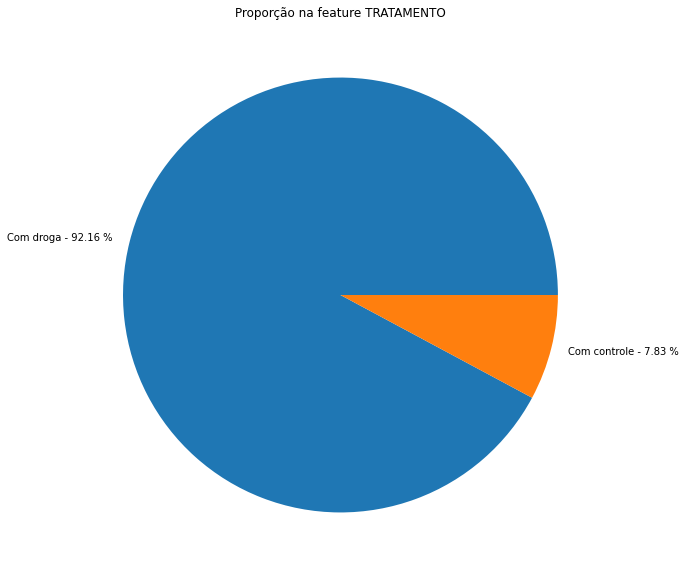

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(df.tratamento.value_counts(), labels = ['Com droga - 92.16 %', 'Com controle - 7.83 %'], labeldistance= 1.08)
plt.title('Proporção na feature TRATAMENTO')
plt.show()

conforme já explorado acima no DESAFIO 1, este desequilibrio entre o grupo de controle e os testes reais se explica pelo fato de que o dataset possui diversos ensaios clicnicos de diversas drogas para a mesma comorbidade.

# Desafio 04 - Aula 1

Descrição: Quantos tipos de drogas foram avaliados nesta base de dados?

Proposta:

In [ ]:
len(df.droga.unique())

3289

Em um primeiro momento podemos dizer que tivemos o estudo total de 3289 drogas diferentes, porém temos um ponto de atenção. Foi designado uma droga fictícia ao grupo de controle? Qual seria o seu nome? Abaixo vamos descobrir:

In [ ]:
df.query('tratamento == "com_controle"').droga.unique()

array(['cacb2b860'], dtype=object)

Na query acima identificamos que foi designada ao grupo de controle a droga: 

**cacb2b860**

Ou seja, podemos responder ao desafio 4 de duas maneiras distintas:

1 - Testaram-se 3289 drogas

2 - Testaram-se 3288 drogas reais e o placebo cacb2b860.

# Desafio 05 - Aula 1

Descrição: Procurar na documentação do PANDAS o método query.

Proposta:

Seguindo em um primeiro momento método já conhecido.

In [ ]:
    df.loc[df['g-0'] > 0].index

Int64Index([    0,     1,     2,     6,     7,    12,    14,    15,    16,
               22,
            ...
            23799, 23801, 23802, 23803, 23805, 23807, 23808, 23809, 23811,
            23812],
           dtype='int64', length=11769)

Existem diversas formas de executar uma query no PANDAS, abaixo o método QUERY

In [ ]:
#df.query('g-0 > 0').index#

Ao executar a query acima encontramos um erro pois o hífen está gerando problema no código. Abaixo iremos tratar com a função replace e retirar os hífens das colunas. Para isto precisaremos chamar o operador STR, que lida com strings.

In [ ]:
df.columns = df.columns.str.replace('-','')

In [ ]:
df.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Conforme acima, podemos observar que a função replace cumpriu seu papel. Vamos para a query.

In [ ]:
df.query('g0 > 0').index

Int64Index([    0,     1,     2,     6,     7,    12,    14,    15,    16,
               22,
            ...
            23799, 23801, 23802, 23803, 23805, 23807, 23808, 23809, 23811,
            23812],
           dtype='int64', length=11769)

# Desafio 06 - Aula 1

Descrição: Retirar o hífen do nome das colunas que contenha.

Proposta: Este desafio foi cumprido no Desafio 5 quando foi requisitado a execução da query. Abaixo repetirei o código.

In [ ]:
#df.columns = df.columns.str.replace('-','')

# Desafio 07 - Aula 1

Descrição: Trabalhar no tratamento visual do gráfico da feature tempo. Inserir título, nome nos eixos, etc...

Proposta:

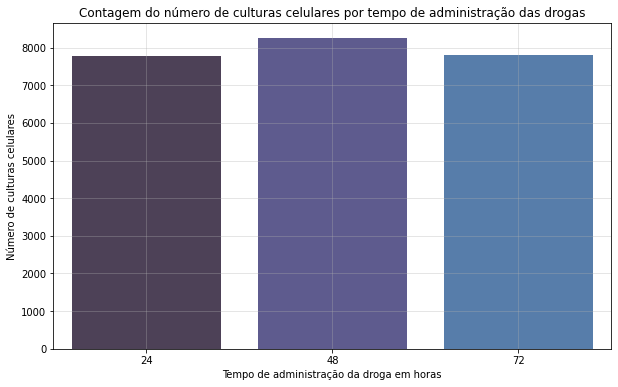

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(data = df, x = 'tempo', ax = ax, palette = sns.color_palette("mako"), saturation = 0.95, alpha = 0.85)
plt.xlabel('Tempo de administração da droga em horas')
plt.ylabel('Número de culturas celulares')
plt.title('Contagem do número de culturas celulares por tempo de administração das drogas')
plt.grid(alpha = 0.4)

# Desafio 08 - Aula 1

Descrição: Resumir o aprendizado até o momento com as análises obtidas.

Proposta:

O dataset proposto é uma estudo clínico do qual o objetivo é entender a resposta de culturas celulares à diferentes fármacos, dosagens e tempos de exposição.

O número total de culturas celulares é de 23814, sendo 1866 culturas de controle. A cultura de controle é uma forma de validar os resultados obtidos com drogas reais, também conhecido como placebo.

No total temos 3289 drogas que foram testadas, sendo que 1 é o placebo do grupo de controle. Muitas drogas foram testadas apenas em 1 cultura celular, nestes casos o resultado não tem relevância para o estudo clínico, pois estatisticamente são ruins.

Temos diferentes tempos de exposição às drogas, pois a cinética bioquímica pode responder de formas variadas à diferentes substâncias. De forma geral se distribuiu uniformemente entre 24,48 e 72 horas.

A dosagem foi também controlado, sendo dividida em: D1 e D2. Aproximadamente com uma divisão 50:50 no dataset.

As demais colunas g# e c# são referentes às respostas gênicas das células às diferentes variáveis do processo. Aparentemente estas colunas estão normalizadas para padronizar o dataset.



# Desafio Extra - Danilo Yukihara - Aula 1

Descrição: Entender dentro do grupo de controle:

1 - Droga utilizada(s)

2 - Dosagen(s) utilizada(s) e sua proporção

3 - Tempo(s) utilizados(s) e sua proporção

4 - Resumo e conclusão desta análise

Proposta:

In [ ]:
df_controle = df.query('tratamento == "com_controle"')

1 - Droga utilizada

In [ ]:
df_controle.droga.unique()

array(['cacb2b860'], dtype=object)

2 - Dosagen(s) utilizada(s) e sua proporção

In [ ]:
df_controle.dose.value_counts()

D1    951
D2    915
Name: dose, dtype: int64

In [ ]:
df_controle.dose.value_counts(normalize= True)

D1    0.509646
D2    0.490354
Name: dose, dtype: float64

3 - Tempo(s) utilizado(s) e sua proporção

In [ ]:
df_controle.tempo.value_counts()

48    648
72    612
24    606
Name: tempo, dtype: int64

In [ ]:
df_controle.tempo.value_counts(normalize= True)

48    0.347267
72    0.327974
24    0.324759
Name: tempo, dtype: float64

4 - Resumo e conclusão das análises

De maneira geral ao isolar apenas o grupo de controle as variáveis dose e tempo se mantém com o mesmo comportamento.

Manter a distribuição e comportamento é encarado de forma positiva, uma vez que o grupo de controle não pode ter viés.

# Imersão Alura - Aula 2 - 04/05/2021

Abaixo serão realizadas as atividades propostas durante a aula.

A primeira atividade é alterar o nome da coluna droga para algo mais adequado como: COMPOSTO.

Para isto, podemos chamar o método rename e passar o parâmetro columns.

Este parametro pede que o nome antigo e o novo seja passado em forma de dicionário.

Precisamos passar o parametro inplace também para que a alteraçao seja efetivada e a variavel df seja redefinida.

In [ ]:
df.rename(columns = {'droga':'composto'}, inplace = True)

In [ ]:
df.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


A outra atividade proposta é plotar um gráfico de barras com a contagem dos compostos (antiga coluna droga).

Para isto iremos usar a biblioteca seaborn que já foi importada antes.

Para recapitular como importar a biblioteca:

import seaborn as sns

Com isso conseguimos agora utilizar a lib seaborn.

Vamos lá!

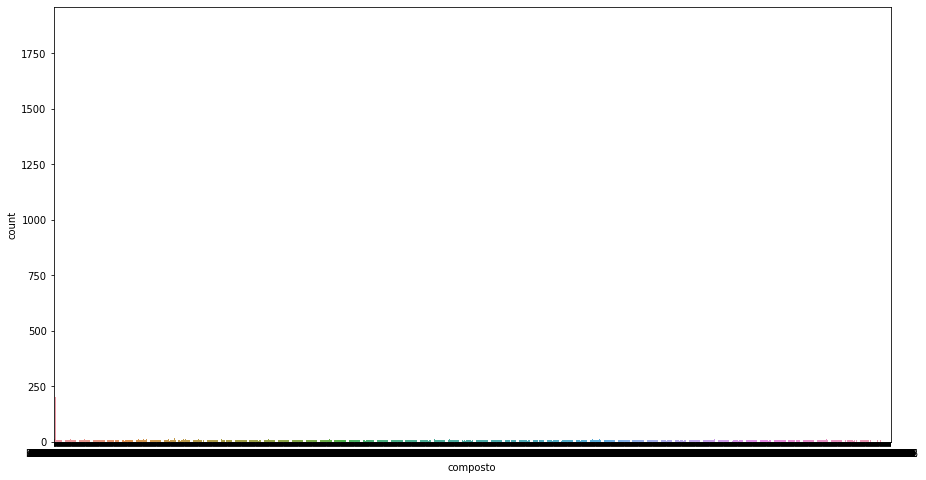

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df, x = 'composto')

Como temos mais de 3000 drogas, o gráfico fica muito poluido e não nos passa nenhuma informação útil.

Podemos manipular os dados como já aprendemos anteriormente. E passar esta informação diretamente para o seaborn.

A proposta aqui colocada difere da solução proposta pelo Thiago, porém entrega a mesma solução. Apesar de não ser expressivo, conseguimos poupar um pouco de memória, pois não precisamos declarar outra variável.

Text(0.5, 1.0, 'Top 5 compostos estudados')

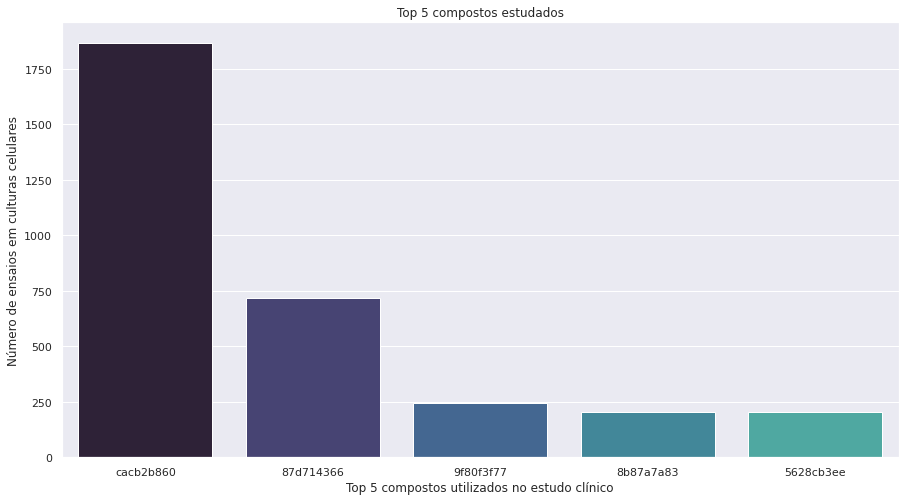

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.set()
sns.barplot(data = df.composto.value_counts()[0:5].reset_index(), x = 'index', y = 'composto', palette = sns.color_palette("mako"))
plt.xlabel('Top 5 compostos utilizados no estudo clínico')
plt.ylabel('Número de ensaios em culturas celulares')
plt.title('Top 5 compostos estudados')

Dando sequência na Aula 2, vamos explorar um pouco mais a coluna g0 de expressão gênica.

In [121]:
len(df.g0.unique())

14367

Podemos observar que na coluna g0, temos 13367 valores únicos.

Vamos agora explorar um pouco mais a distribuiçao destes valores:

In [122]:
df.g0.describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g0, dtype: float64

Com a função describe temos acesso à diversas informações estatísticas desta coluna, tais como: 

número total de valores, média (mean), desvio padrão (std), min (minimo), max (máximo), distribuição normal dos valores também.

De forma visual, podemos plotar 2 tipos de gráfico para ver o espalhamento destes dados: boxplot e histograma.

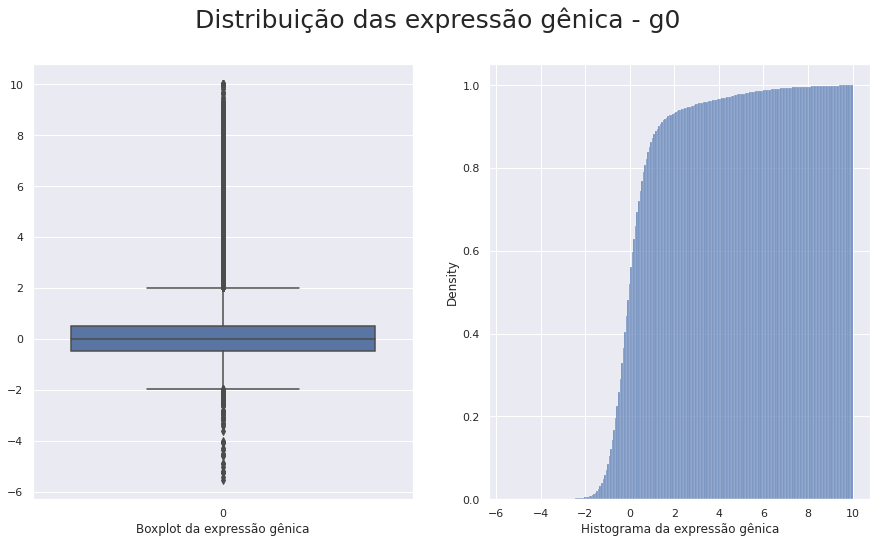

In [163]:
fig, ax = plt.subplots(figsize = (15,8), nrows = 1, ncols = 2)
ax[0].set_xlabel('Boxplot da expressão gênica')
ax[1].set_xlabel('Histograma da expressão gênica')
fig.suptitle('Distribuição das expressão gênica - g0', fontsize = 25)
sns.boxplot(data = df.g0, ax = ax[0])
sns.histplot(data = df.g0, ax = ax[1], cumulative = True, stat = 'density')

Visualmente o histograma é melhor para visualizar os dados, porém com o box plot podemos observar os outliers inferiores e superiores (pontos fora dos whiskers).

Podemos também analisar alguns outros parametros estatísticos, tais como: moda, mediana e média. Abaixo os códigos para isso:

Primeiro vamos para a média

In [158]:
print(f'{df.g0.mean():.2f}')

0.25


Agora a moda. A moda não gera um int64 ou um float64, mas sim uma lista. Isto ocorre, pois dentro de um grupo de dados podemos ter mais de um valor de moda.

In [159]:
df.g0.mode()

0    0.0
dtype: float64

Neste caso temos apenas o valor zero.

Seguindo para a mediana, que é o valor que divide os dados ao meio.

In [160]:
df.g0.median()

-0.00885

Em uma análise sem muita profundidade, podemos observar que a resposta gênica de g0 respondeu de forma homogenea. Ou seja, 50% da população teve uma expressão gênica negativa e 50% uma resposta positiva. 

Podemos também trazer outras variáveis para dar mais clareza. Vamos trazer a dosagem para o histograma.

Text(0.5, 0, 'Grupo de exposto ao composto')

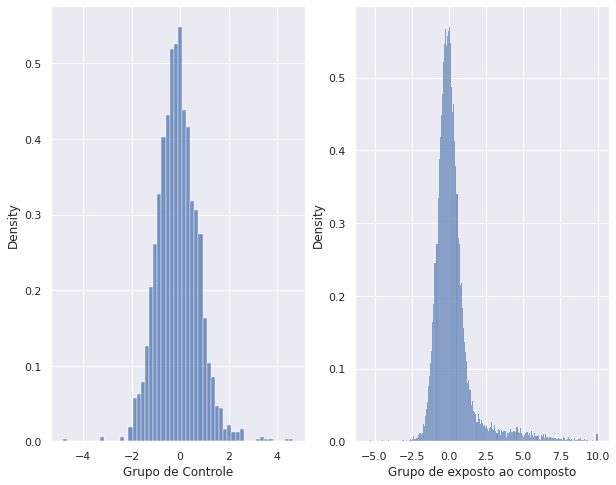

In [172]:
fig, ax = plt.subplots(figsize = (10,8), nrows = 1, ncols = 2)
sns.histplot(data = df.query('tratamento == "com_controle"'), x = 'g0', stat = 'density', ax = ax[0])
sns.histplot(data = df.query('tratamento == "com_droga"'), x = 'g0', stat = 'density', ax = ax[1])
ax[0].set_xlabel('Grupo de Controle')
ax[1].set_xlabel('Grupo de exposto ao composto')

Nesta primeira análise, podemos ver que o grupo de controle segue uma distribuição normal melhor que o grupo exposto ao comspoto.

Para a análise do grupo de contole:

In [187]:
df.query('tratamento == "com_controle"').g0.describe()

count    1866.000000
mean       -0.096364
std         0.833248
min        -4.859000
25%        -0.639000
50%        -0.132650
75%         0.408800
max         4.670000
Name: g0, dtype: float64

A moda é:

In [182]:
df.query('tratamento == "com_controle"').g0.mode()

0   -1.419
1   -1.326
2   -1.187
3   -1.166
4   -1.103
5   -1.052
6    1.036
dtype: float64

A variância é uma medida que indica a dispersão dos dados:

In [191]:
df.query('tratamento == "com_controle"').g0.var()

0.6943024860038235

Para a análise do grupo exposto ao composto:

In [188]:
df.query('tratamento == "com_droga"').g0.describe()

count    21948.000000
mean         0.277675
std          1.427121
min         -5.513000
25%         -0.460925
50%          0.000000
75%          0.533925
max         10.000000
Name: g0, dtype: float64

A moda é:

In [189]:
df.query('tratamento == "com_droga"').g0.mode()

0    0.0
dtype: float64

E a variancia:

In [192]:
df.query('tratamento == "com_droga"').g0.var()

2.03667362415124

Com esta análise é possivel observar alguns pontos:

1 - Expor as culturas celulares ao composto, fez com que a média se deslocasse um pouco à direita. Saindo de uma resposta negativa para uma positiva.

2 - O mesmo aconteceu para a mediana.

3 - Quando passamos para a moda, é possível notar o mesmo comportamento.

4 - QUando exposto ao composto o desvio padrão e a variancia aumentaram, criando uma cauda à direita com mais respostas positivas.

5 - QUando pegamos o terceiro quartil (75%) vemos uma maior resposta.



Seguindo a aula 2, podemos também analisar os genes de forma global. Os genes vão de 0 até 771. Para selecionar esta parte do dataset, faremos o fatiamento abaixo, criando um dataset secundario chamado df_gene, criarei também dois outros datasets dg_gene_controle e df_gene_droga para entender o comportamento dos genes quando exposto ao composto:

In [203]:
df_gene = df.loc[:,'g0':'g771']
df_gene_controle = df.query('tratamento == "com_controle"').loc[:,'g0':'g771']
df_gene_droga = df.query('tratamento == "com_droga"').loc[:,'g0':'g771']

Uma análise geral deste novo dataset:

In [196]:
df_gene.describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

Podemos também analisar a resposta média de todos os genes, para isso podemos usar um artificio matematica de manipulação de matriz que se chama TRANSPOSIÇAO.

A resposta sem separar o grupo de controle do grupo exposto:

In [200]:
df_gene.describe().T['mean'].mean()

0.009009573150247703

A resposta apenas do grupo de controle:

In [204]:
df_gene_controle.describe().T['mean'].mean()

0.014114154088155079

A resposta apenas do grupo exposto:

In [205]:
df_gene_droga.describe().T['mean'].mean()

0.008575586088550281

A expressão gênica global média foi maior no grupo de controle.

Vamos visualizar estas 3 curvas:

Text(0.5, 0.91, 'Resposta gênica global média')

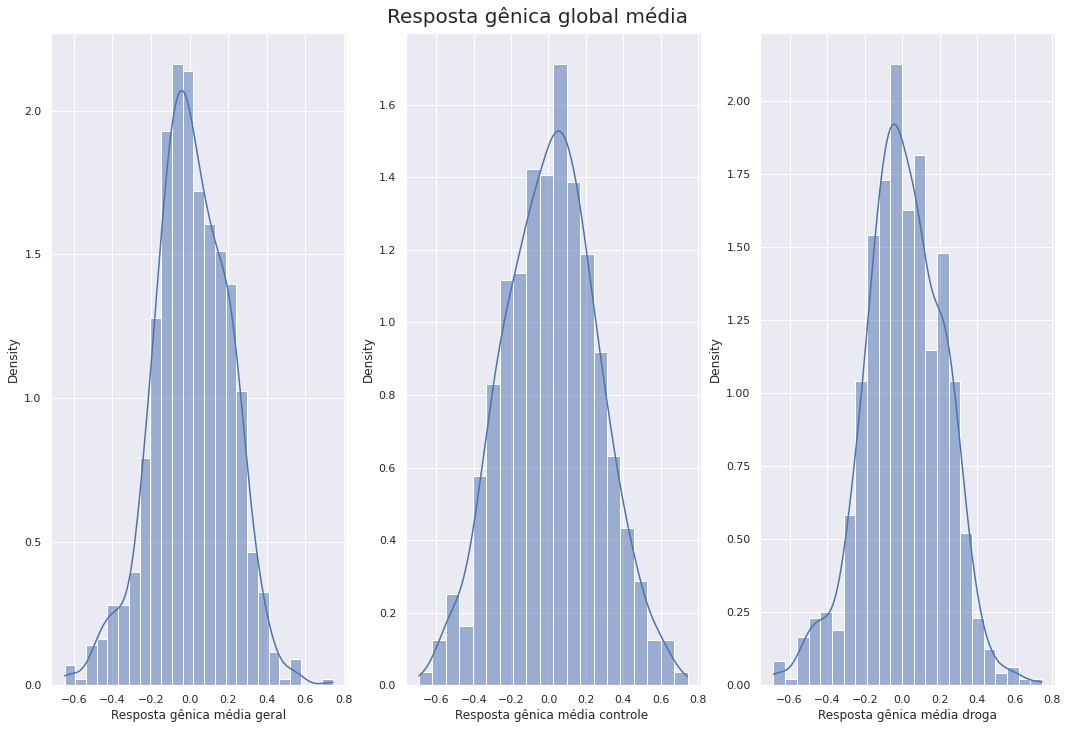

In [223]:
fig, ax = plt.subplots(figsize = (18,12), ncols = 3)
sns.histplot(data = df_gene.describe().T, x = 'mean', ax = ax[0], stat = 'density', kde = True)
sns.histplot(data = df_gene_controle.describe().T, x = 'mean', ax = ax[1], stat = 'density', kde = True)
sns.histplot(data = df_gene_droga.describe().T, x = 'mean', ax = ax[2], stat = 'density', kde = True)
ax[0].set_xlabel('Resposta gênica média geral')
ax[1].set_xlabel('Resposta gênica média controle ')
ax[2].set_xlabel('Resposta gênica média droga')
fig.suptitle('Resposta gênica global média', fontsize = 20, y = 0.91 )

Text(0.5, 0.91, 'Resposta gênica global máxima')

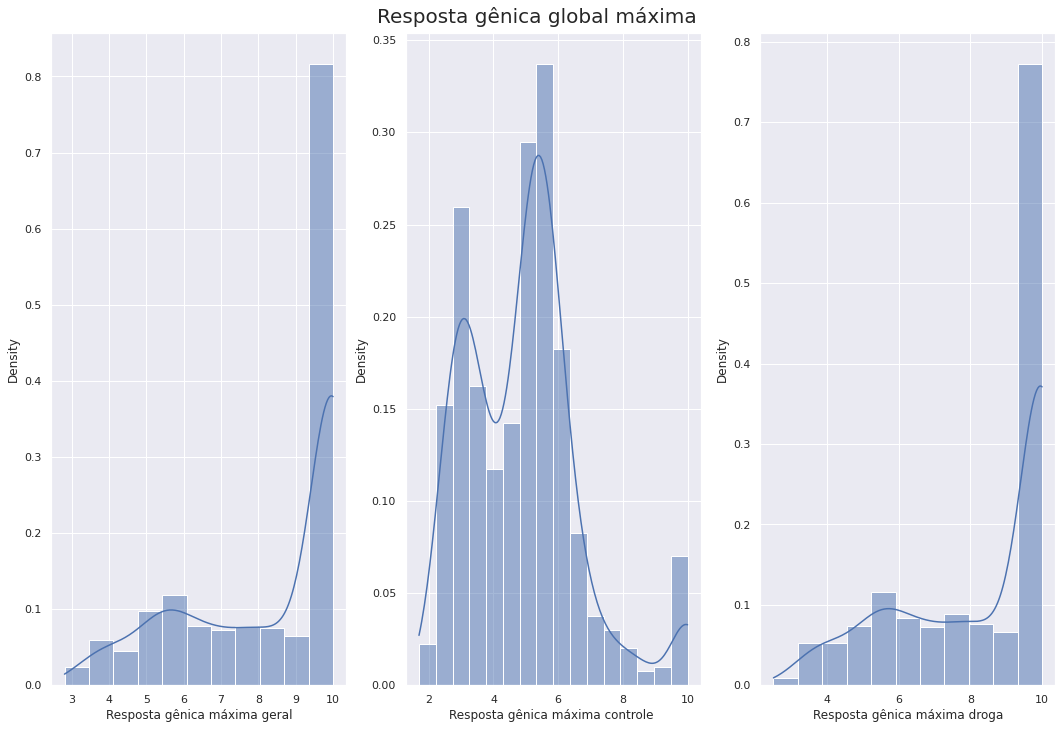

In [224]:
fig, ax = plt.subplots(figsize = (18,12), ncols = 3)
sns.histplot(data = df_gene.describe().T, x = 'max', ax = ax[0], stat = 'density', kde = True)
sns.histplot(data = df_gene_controle.describe().T, x = 'max', ax = ax[1], stat = 'density', kde = True)
sns.histplot(data = df_gene_droga.describe().T, x = 'max', ax = ax[2], stat = 'density', kde = True)
ax[0].set_xlabel('Resposta gênica máxima geral')
ax[1].set_xlabel('Resposta gênica máxima controle ')
ax[2].set_xlabel('Resposta gênica máxima droga')
fig.suptitle('Resposta gênica global máxima', fontsize = 20, y = 0.91 )

Text(0.5, 0.91, 'Resposta gênica global - desvio padrao')

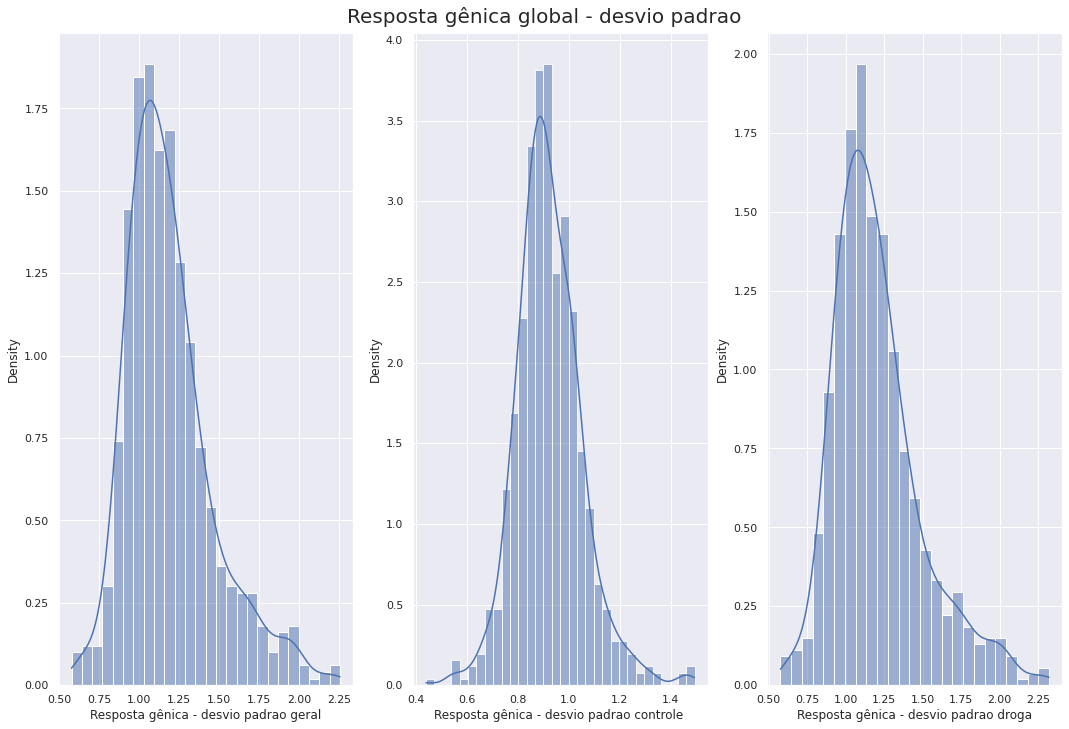

In [225]:
fig, ax = plt.subplots(figsize = (18,12), ncols = 3)
sns.histplot(data = df_gene.describe().T, x = 'std', ax = ax[0], stat = 'density', kde = True)
sns.histplot(data = df_gene_controle.describe().T, x = 'std', ax = ax[1], stat = 'density', kde = True)
sns.histplot(data = df_gene_droga.describe().T, x = 'std', ax = ax[2], stat = 'density', kde = True)
ax[0].set_xlabel('Resposta gênica - desvio padrao geral')
ax[1].set_xlabel('Resposta gênica - desvio padrao controle ')
ax[2].set_xlabel('Resposta gênica - desvio padrao droga')
fig.suptitle('Resposta gênica global - desvio padrao', fontsize = 20, y = 0.91 )

# Desafio 01 e 02 - Aula 2

Descrição: 

01- Ordenar as colunas do countplot de forma decrescente.

02 - Melhorar a estética do gráfico, trocando tamanho da fonte, etc...

Proposta:

Vamos seguir também com a proposta colocada em aula, pois existe um conceito interessante sobre o @ na query. Colocar @ na query faz com que possamos acessar variáveis declaradas fora da query, sendo uma ferramenta poderosa na análise de dados.

In [ ]:
index_compostos = df.composto.value_counts()[0:5].index

In [ ]:
df.query('composto in @index_compostos').composto.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

Para uma análise complementar, irei passar também o parametro hue que inseri uma variável adicional, nesse caso 'dose'.

Text(0.5, 1.0, 'Top 5 compostos estudados')

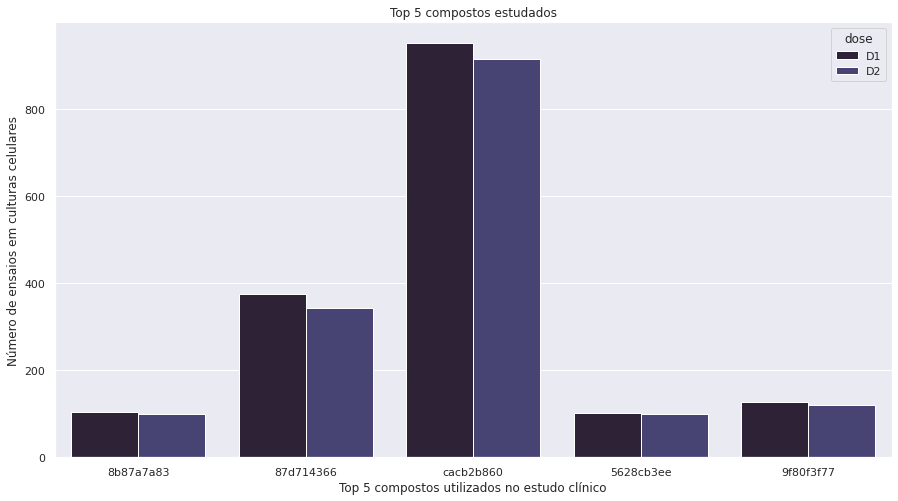

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df.query('composto in @index_compostos'), x = 'composto', palette = sns.color_palette("mako"), hue = 'dose')
plt.xlabel('Top 5 compostos utilizados no estudo clínico')
plt.ylabel('Número de ensaios em culturas celulares')
plt.title('Top 5 compostos estudados')

Chegamos ao mesmo resultado, porém a ordem foi decrescente foi desconfigurada. Para organizar a informação, precisamos passar outro parametro para o countplot: order.

In [ ]:
ordem = df.composto.value_counts()[:5].index

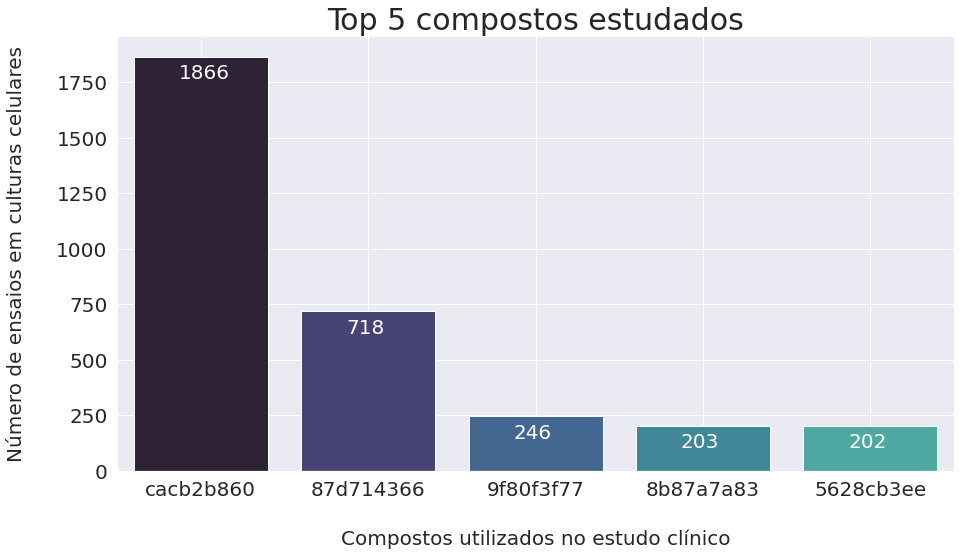

In [154]:
fig, ax = plt.subplots(figsize = (15,8))
ax1 = sns.countplot(data = df.query('composto in @index_compostos'), x = 'composto', palette = sns.color_palette("mako"), order = ordem)
plt.xlabel('Compostos utilizados no estudo clínico', fontsize = 20, labelpad = 30)
plt.ylabel('Número de ensaios em culturas celulares', fontsize = 20, labelpad= 30)
plt.title('Top 5 compostos estudados', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(alpha = 1)
for p in ax1.patches:
        ax1.annotate( f'{p.get_height()}', (p.get_x()+0.268, p.get_height()-100), color = 'white', fontsize = 20)

Com o parametro order, definimos a ordem que os xticks devem aparecer em nossa plotagem.

# Desafio 03 - Aula 2

Descrição: Utilizar o a lib seaborn para plotar os gráficos de estudo

Proposta: de maneira generalizada utilizei o seaborn em todos os gráficos utilizados.

# Desafio 04 - Aula 2

Descrição: Estudar os valores que a função describe() retorna

Proposta:

Count - contabiliza o número de observações dentro da coluna desejada

mean - retorna a média dos valores da coluna (soma dos valores individuais / número de observacoes)

std - é uma fórmula mais complexa que indica o desvio para cima e para baixo dos valores ao redor do valor central (média).

min - menor valor encontrado nas observaçoes

25% - primeiro quartil, indica que 25% dos valores observados estão abaixo do valor informado

50% - segundo quartil ou mediana, é o divisor central do espaço amostra. 50% dos valores observados estão abaixo do limite da mediana.

75% - terceiro quartil, indica que 75% dos valores observados estão abaixo do valor informado

x - maior valor encontrado nas observaçoes

# Desafio 05 - Aula 2

Descrição: Refletir sobre a manipulação do tamanho das visualizações

Proposta: De maneira geral tentamos adequar as dimensões de plotagem à mensagem que queremos passar ou enfatizar. Uma visão muito macro, pode esconder detalhes importantes, assim como uma visão muito "próxima" pode esconder algumas tendências. O ideal é encontrar um equilíbrio entre a mensagem que se quer passar e as boas práticas de data visualization.


# Desafio 06 - Aula 2

Descrição: utilizar boxplot para fazer outras análises. utilizar também o histograma.

Proposta: Realizei algumas análises extras com histograma ao longo da aula, desta maneira irei focar apenas no boxplot. Vou analisar a expressão gênica através da dose e também tempo.

Abaixo a primeira análise sobre dose no gene 0:

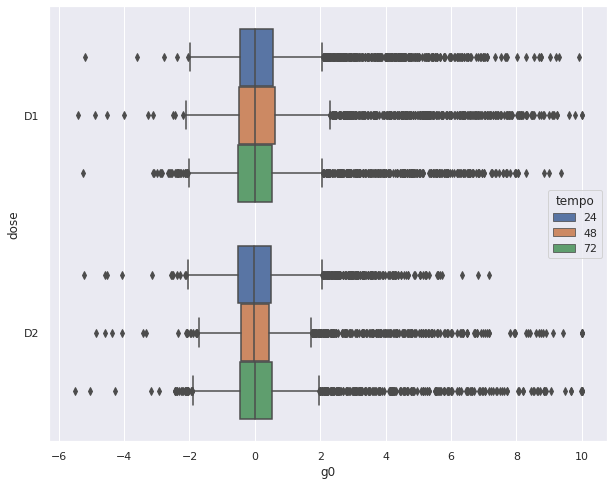

In [232]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'g0', y = 'dose', hue = 'tempo')

Neste primeiro boxplot, é possível observar que de maneira geral a mediana está proxima do zero.

Para D1, conforme se aumenta o tempo de exposição a mediana nao tende a se alterar, mas os outliers minimos tendem a se concentrar em valores maiores. Os outliers superiores não sofrem alteracao com o aumento da exposiçao.

Para D2, conforme se aumenta o tempo de exposiçao, a mediana tende a se deslocar a direita bem como os outliers superiores.

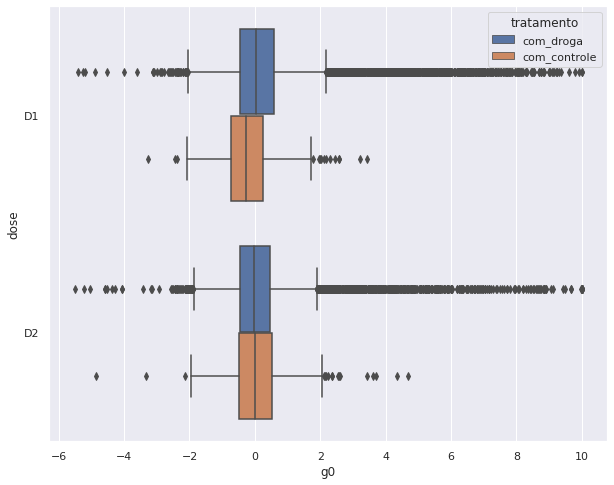

In [233]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'g0', y = 'dose', hue = 'tratamento')

Nesta análise, temos que:

Para D1, o grupo de controle possui mediana inferior ao grupo exposto para g0. O grupo de controle possui outliers bem menores também.

Para D2 a mediana parece semelhante, porém o grupo exposto possui muito mais outliers.

# Desafio 07 - Aula 2

Descrição: Criar um resumo das coisas aprendidas na aula 02.

Proposta:

Aprendemos como renomear uma coluna especifica para um nome especifico.

Um ponto importante mostrado foi que nem sempre plotar toda a informação é a saída como no caso deste dataset que tem mais de 3000 drogas. Filtrar as informaçoes mais relevantes é muito mais assertivo.

Passamos por gráficos estatisticos como o boxplot e histogramas, bem como as medidas estatísticas intrínsecas à eles: moda, media, mediana, quartil, etc...

Aprendemos colocar nossos xticks na ordem desejada utilizando o parametro order no seaborn e também combinar a função describe com a operaçao matricial de transposiçao, para assim extrair mais informações das expressões gênicas.

Houve um conceito inicial sobre as colunas c#, que na verdade são referentes à diversos tipos de células nas quais as drogas são testadas, por exemplo: neurônios, células cancerígenas, células epiteliais,etc...

Indiretamente a aula também fez com que buscassemos outros conhecimentos, no meu caso eu busquei aprender um pouco mais sobre subplots, para poder ter visualizaçoes melhores.

